#### Jericho McLeod
#### CSI-873 Homework 2

#### Problem 3.2 

Import any needed libraries

In [1]:
import math
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Define a function to measure entropy in an array using $Entropy(S) \equiv \sum_{i=1}^{c} -p_i log_2 p_i$

In [2]:
def attr_entropy(attr):
    entropy_dict = {}
    attr_entropy = 0
    attr_len = len(attr)
    for i in attr:
        if i in entropy_dict:
            entropy_dict[i] += 1
        else: 
            entropy_dict[i] = 1
    for k,v in entropy_dict.items():
        frac = v/attr_len # P
        updated_v = -frac*math.log2(frac) # -p log2 p
        attr_entropy+=updated_v # sum of
        entropy_dict[k]=updated_v
    return(attr_entropy)

Define a second function to determind the information gain for a specific attribute using $Gain(S,A) \equiv Entropy(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}Entropy(S_v)$

In [3]:
def attr_gain(attr,target):   
    entropy = attr_entropy(target)
    gain = entropy # Entropy(S)
    attr_counts = {}
    attr_subset = {}
    attr_len = len(attr)
    attr_ent = attr_entropy(attr)
    for i in range(len(attr)):
        if attr[i] not in attr_counts:
            attr_counts[attr[i]] = 1
        else:
            attr_counts[attr[i]] += 1
        if attr[i] not in attr_subset:
            attr_subset[attr[i]]=[target[i]]
        else:
            attr_subset[attr[i]].append(target[i])
    for k,v  in attr_subset.items():
        subset_len = len(v)
        k_entropy = attr_entropy(v)
    #    print(k,k_entropy,subset_len,attr_len)
        gain = gain - ((subset_len/attr_len)*k_entropy) # -Sum of |Sv|/|S| * Entropy(Sv)
    #    print(subset_len, attr_len)
    #print('Gain',gain)
    return(attr_ent,gain)

#entropy2,gain2 = attr_gain(a2,classification)

Create vectors for training data (Note that Instance is merely index for purposes of this script):

In [4]:
classification = ['+','+','-','+','-','-']
a1 = ['T','T','T','F','F','F']
a2 = ['T','T','F','F','T','T']

Call the functions to determine the outputs:

In [5]:
class_ent = attr_entropy(classification)
a1_ent = attr_entropy(a1)
a2_ent = attr_entropy(a2)
entropy2,gain2 = attr_gain(a2,classification)

Print the solution to problem 3.2:

In [6]:
print("Entropy with respect to the target function classification:")
print(class_ent)

print("\nEntropy of the a1 attribute:")
print(a1_ent)

print("\nEntropy of the a2 attribute:")
print(a2_ent)

print("\nInformation Gain of a2:")
print(gain2)

Entropy with respect to the target function classification:
1.0

Entropy of the a1 attribute:
1.0

Entropy of the a2 attribute:
0.9182958340544896

Information Gain of a2:
5.551115123125783e-17


##### Notes on solutions to 3.2:

Entropy in the classification is 1 because there are six observations split 1:1, which maximizes the entropy function. This is mirrored in the a1 attribute, but the a2 attribute contains a 4:2 split, thus has lower entropy.

The information gain is small enough to be considered 0, as 5.55e-17 is less than machine precision of 1e-12.

#### Problem 3.4

##### Part A

Input the dataset:

In [7]:
Sky = ['Sunny', 'Sunny', 'Rainy', 'Sunny']
AirTemp = ['Warm', 'Warm', 'Cold', 'Warm']
Humidity = ['Normal', 'High', 'High', 'High']
Wind = ['Strong', 'Strong', 'Strong', 'Strong']
Water = ['Warm', 'Warm', 'Warm', 'Cool']
Forecast = ['Same', 'Same', 'Change', 'Change']
EnjoySport = ['Yes', 'Yes', 'No', 'Yes']
data = [Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport]
data_labels = ['Sky','AirTemp','Humidity','Wind','Water','Forecast','EnjoySport']

Create a function to determine the highest gain from a dataset of vectors

In [8]:
def highest_gain(data,target_pos):
    max_gain = 0
    max_gain_var = ""
    for i in range(len(data)):
        if i != target_pos:
            entropy,gain = attr_gain(data[i],data[6])
            if gain > max_gain:
                max_gain = gain
                max_gain_var = data_labels[i]
            #print(data_labels[i],gain)
    return(max_gain,max_gain_var)

max_gain,max_gain_var = highest_gain(data,6)
print(max_gain_var,'has the highest gain or is tied for highest gain at',max_gain)

Sky has the highest gain or is tied for highest gain at 0.8112781244591328


Create a function to subset the data for a specific input

In [9]:
def subset_arrays(n):
    subset_array = []
    for i in range(n):
        subset_array.append([])
    return(subset_array)

def subset_data(data,subset_index):
    subset_on = []
    for i in data[subset_index]:
        if i not in subset_on: subset_on.append(i)
    subsets = subset_arrays(len(subset_on))
    for i in range(len(data)):
        if i != subset_index:
            for j in subsets:
                j.append([])
            for j in range(len(data[i])):
                index = subset_on.index(data[subset_index][j])
                if i >=subset_index: 
                    temp_i = i-1
                else: 
                    temp_i = i
                subsets[index][temp_i].append(data[i][j])
    #print(subsets)
    return(subsets)

Subset data, update labels array, and display results

In [10]:
subset1_labels = copy.deepcopy(data_labels)
subset1_labels.remove(max_gain_var)
subsets = subset_data(data,0)
for i in range(len(subsets)):
    print('\nSubset',i)
    for j in range(len(subsets[i])):
        print(subset1_labels[j],subsets[i][j])


Subset 0
AirTemp ['Warm', 'Warm', 'Warm']
Humidity ['Normal', 'High', 'High']
Wind ['Strong', 'Strong', 'Strong']
Water ['Warm', 'Warm', 'Cool']
Forecast ['Same', 'Same', 'Change']
EnjoySport ['Yes', 'Yes', 'Yes']

Subset 1
AirTemp ['Cold']
Humidity ['High']
Wind ['Strong']
Water ['Warm']
Forecast ['Change']
EnjoySport ['No']


Given that there is visibly no remaining Entropy in EnjoySport, an automated system for create decision trees would stop here. 

We can verify this by running the target attribute back through entropy calculations:

In [11]:
entropy_sub1 = attr_entropy(subsets[0][-1])
entropy_sub2 = attr_entropy(subsets[1][-1])
print("Subset 1 entropy:",entropy_sub1)
print("Subset 1 entropy:",entropy_sub2)

Subset 1 entropy: 0.0
Subset 1 entropy: 0.0


Therefore, the decision tree is merely 
"Sky" = Sunny -> EnjoySport == True
"Sky" = Rainy -> EnjoySport == False


##### Part B

This decision tree matches one of the most general hypotheses generated from the Candidate Elimination algorithms:

[Sunny, ?, ?, ?, ?, ?]

Logically, this is ideal, as a more general model is shorter, and a shorter model is better. Philosophical reasoning aside, this is also less likely to overfit. However, as accuracy can be impacted, it can still be necessary to create many short hypotheses and use them in conjunction, such as in a random forest. 

##### Part C

Adding an additional observation to the data and displaying the gain for each candidate attribute at each step requires first re-creating the data variable:

In [12]:
Sky = ['Sunny', 'Sunny', 'Rainy', 'Sunny','Sunny']
AirTemp = ['Warm', 'Warm', 'Cold', 'Warm','Warm']
Humidity = ['Normal', 'High', 'High', 'High','Normal']
Wind = ['Strong', 'Strong', 'Strong', 'Strong','Weak']
Water = ['Warm', 'Warm', 'Warm', 'Cool','Warm']
Forecast = ['Same', 'Same', 'Change', 'Change','Same']
EnjoySport = ['Yes', 'Yes', 'No', 'Yes','No']
data = [Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport]
data_labels = ['Sky','AirTemp','Humidity','Wind','Water','Forecast','EnjoySport']

Then, for each attribute, we must determine the gain:

In [13]:
target_pos = 6
for i in range(len(data)):
    if i != target_pos:
        entropy,gain = attr_gain(data[i],data[target_pos])
        print("%8s:  Entropy: %f  Gain: %f"%(data_labels[i],entropy,gain))

     Sky:  Entropy: 0.721928  Gain: 0.321928
 AirTemp:  Entropy: 0.721928  Gain: 0.321928
Humidity:  Entropy: 0.970951  Gain: 0.019973
    Wind:  Entropy: 0.721928  Gain: 0.321928
   Water:  Entropy: 0.721928  Gain: 0.170951
Forecast:  Entropy: 0.970951  Gain: 0.019973


Again we can choose the highest gain attribute, which is again tied with AirTemp and newly-tied with Wind. 

Then we must subset the data on by the Sky attribute and check for entropy within the subsets. 

In [14]:
subset1_labels = copy.deepcopy(data_labels)
subset1_labels.remove(max_gain_var)
subsets = subset_data(data,0)
entropy_sub1 = attr_entropy(subsets[0][-1])
entropy_sub2 = attr_entropy(subsets[1][-1])
print("Subset 1 entropy:",entropy_sub1)
print("Subset 1 entropy:",entropy_sub2)
for i in range(len(subsets)):
    print('\nSubset',i)
    for j in range(len(subsets[i])):
        print(subset1_labels[j],subsets[i][j])

Subset 1 entropy: 0.8112781244591328
Subset 1 entropy: 0.0

Subset 0
AirTemp ['Warm', 'Warm', 'Warm', 'Warm']
Humidity ['Normal', 'High', 'High', 'Normal']
Wind ['Strong', 'Strong', 'Strong', 'Weak']
Water ['Warm', 'Warm', 'Cool', 'Warm']
Forecast ['Same', 'Same', 'Change', 'Same']
EnjoySport ['Yes', 'Yes', 'Yes', 'No']

Subset 1
AirTemp ['Cold']
Humidity ['High']
Wind ['Strong']
Water ['Warm']
Forecast ['Change']
EnjoySport ['No']


As is readily apparent, there remains entropy within the EnjoySport variable. We need to add another branch to the decision tree and check entropy again.

In [15]:
for i in range(len(subsets[0])):
    if i != target_pos and i != 0:
        entropy,gain = attr_gain(subsets[0][i],subsets[0][5])
        print("%8s:  Entropy: %f  Gain: %f"%(data_labels[i],entropy,gain))

 AirTemp:  Entropy: 1.000000  Gain: 0.311278
Humidity:  Entropy: 0.811278  Gain: 0.811278
    Wind:  Entropy: 0.811278  Gain: 0.122556
   Water:  Entropy: 0.811278  Gain: 0.122556
Forecast:  Entropy: 0.811278  Gain: 0.811278


Thus at this point we will branch on Humidity and further subset the data. 

In [16]:
subset2_labels = copy.deepcopy(subset1_labels)
subset2_labels.remove('Humidity')
subsets2 = subset_data(subsets[0],1)
entropy_sub1 = attr_entropy(subsets2[0][-1])
entropy_sub2 = attr_entropy(subsets2[1][-1])
print("Subset 2.1 entropy:",entropy_sub1)
print("Subset 2.2 entropy:",entropy_sub2)
for i in range(len(subsets2)):
    print('\nSubset',i)
    for j in range(len(subsets2[i])):
        print(subset2_labels[j],subsets2[i][j])

Subset 2.1 entropy: 1.0
Subset 2.2 entropy: 0.0

Subset 0
AirTemp ['Warm', 'Warm']
Wind ['Strong', 'Weak']
Water ['Warm', 'Warm']
Forecast ['Same', 'Same']
EnjoySport ['Yes', 'No']

Subset 1
AirTemp ['Warm', 'Warm']
Wind ['Strong', 'Strong']
Water ['Warm', 'Cool']
Forecast ['Same', 'Change']
EnjoySport ['Yes', 'Yes']


Subset 2.1 contains entropy still, so we need to determine an additional attribute to further branch the decision tree.

In [17]:
for i in range(len(subsets2[0])):
    if i != target_pos and i != 0:
        entropy,gain = attr_gain(subsets2[0][i],subsets2[0][4])
        print("%10s:  Entropy: %f  Gain: %f"%(subset2_labels[i],entropy,gain))

      Wind:  Entropy: 1.000000  Gain: 1.000000
     Water:  Entropy: 0.000000  Gain: 0.000000
  Forecast:  Entropy: 0.000000  Gain: 0.000000
EnjoySport:  Entropy: 1.000000  Gain: 1.000000


This shows that we will branch on Wind as the only possible way to gain additional information. 

Thus we have the following Decision Tree:

    Branch on Sky (Gain = 0.321928)

        if Rainy:

            EnjoySport = No

        if Sunny:

            Branch on Humidity (Gain = 0.811278)

                if High:

                    EnjoySport = Yes

                If Low:

                    Branch on Wind (Gain = 1.0)

                        if Strong:

                            Enjoy Sport = Yes

                        if Weak:

                            EnjoySPort = No

Gain of 1 indicates that the branch terminates at this point; no further tests are required in order to obtain a minimally lengthy decision tree that fits the data.

#### Problem 4.1

What are the weights shown in figure 4.3?

In [18]:
w0 = -.95
w1 = -1
w2 = .5

For ease of showing that these values are correct, here is a plot of points showing whether they would be classified (+) or (-), where blue = (+) and red = (-). Note the intercepts of -1 on the X axis and 2 on the Y axis. 

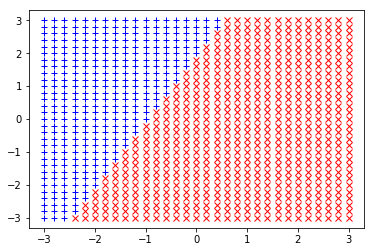

In [19]:
tests = []
for i in range(-15,16):
    for j in range(-15,16):
        xy = [i/5,j/5]
        tests.append(xy)

w0 = -.95
w1 = -1
w2 = .5

x=[0,0,1,1]
y=[0,1,0,1]

def test(xy):
    result = w0 + w1*xy[0] + w2*xy[1] 
    if result > 0:
        return(1)
    else: return(0)

for i in tests:
    result = test(i)
    if result == 1:
        tick = 'b+'
    else: tick = 'rx'
    i.append(tick)
    plt.plot(i[0],i[1],i[2])

plt.show()

#### Problem 4.2

##### Design a 2-input perceptron that implements the boolean function A AND NOT B.


Here is one possible set of weights that will work.

We are trying to achieve the results shown in the following visualization:

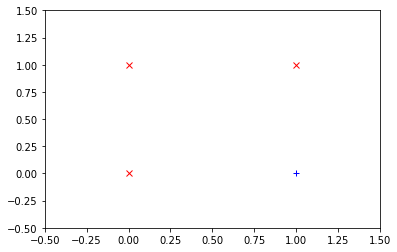

In [21]:
plt.xlim(-.5, 1.5)
plt.ylim(-.5, 1.5)
plt.plot(1,0, 'b+')
plt.plot(1,1, 'rx')
plt.plot(0,1, 'rx')
plt.plot(0,0, 'rx')
plt.show()

For this, the following weights are sufficient.

In [22]:
w0 = -.4
w1 = 1
w2 = -1

x=[0,0,1,1]
y=[0,1,0,1]

for i in range(len(x)):
    output = w0 + w1*x[i] + w2*y[i] 
    print(i,output)

0 -0.4
1 -1.4
2 0.6
3 -0.4


Testing these weights with non-binary inputs allows us to visualize the underlying algebraic output, and which side equates to a positive versus a negative solution. Note the binary input positions are represented by the corners of the space shown

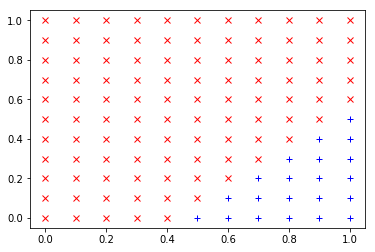

In [20]:
tests = []
for i in range(0,11):
    for j in range(0,11):
        xy = [i/10,j/10]
        tests.append(xy)

w0 = -.4
w1 = 1
w2 = -1

x=[0,0,1,1]
y=[0,1,0,1]

def test(xy):
    result = w0 + w1*xy[0] + w2*xy[1] 
    if result > 0:
        return(1)
    else: return(0)

for i in tests:
    result = test(i)
    if result == 1:
        tick = 'b+'
    else: tick = 'rx'
    i.append(tick)
    if i[0] == 0 and i[1] == 0:
        plt.plot(i[0],i[1],'rx')
    elif i[0] == 0 and i[1] == 1:
        plt.plot(i[0],i[1],'rx')
    elif i[0] == 1 and i[1] == 0:
        plt.plot(i[0],i[1],'b+')
    elif i[0] == 1 and i[1] == 1:
        plt.plot(i[0],i[1],'rx')
    else:
        plt.plot(i[0],i[1],i[2])

plt.show()

##### Design a two-layer network of perceptrons that implements A XOR B.

First, let us visualize the system we are trying to create.

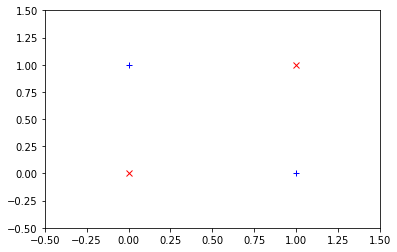

In [21]:
plt.xlim(-.5, 1.5)
plt.ylim(-.5, 1.5)
plt.plot(1,0, 'b+')
plt.plot(1,1, 'rx')
plt.plot(0,1, 'b+')
plt.plot(0,0, 'rx')
plt.show()

Now let's identify weights for the first layer, A and not B, based on the early problem:

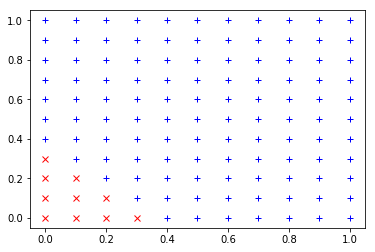

In [22]:
tests = []
for i in range(0,11):
    for j in range(0,11):
        xy = [i/10,j/10]
        tests.append(xy)

w0 = -.33
w1 = 1
w2 = 1

def test(xy):
    result = w0 + w1*xy[0] + w2*xy[1] 
    if result > 0:
        return(1)
    else: return(0)

for i in tests:
    result = test(i)
    if result == 1:
        tick = 'b+'
    else: tick = 'rx'
    i.append(tick)
    plt.plot(i[0],i[1],i[2])

plt.show()

And another to find the second set of weights:

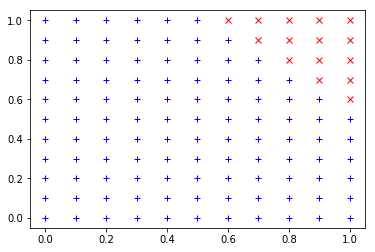

In [23]:
tests = []
for i in range(0,11):
    for j in range(0,11):
        xy = [i/10,j/10]
        tests.append(xy)

w0 = 1
w1 = -.66
w2 = -.66

def test(xy):
    result = w0 + w1*xy[0] + w2*xy[1] 
    if result > 0:
        return(1)
    else: return(0)

for i in tests:
    result = test(i)
    if result == 1:
        tick = 'b+'
    else: tick = 'rx'
    i.append(tick)
    plt.plot(i[0],i[1],i[2])

plt.show()

And now to combine the two into a single system:

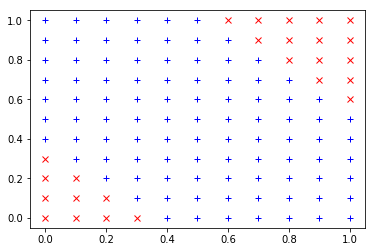

In [28]:
w0_0 = -.33
w0_1 = 1
w0_2 = 1

w1_0 = 1
w1_1 = -.66
w1_2 = -.66


tests = []
for i in range(0,11):
    for j in range(0,11):
        xy = [i/10,j/10]
        tests.append(xy)

def test(xy):
    result1 = w0_0 + w0_1*xy[0] + w0_2*xy[1] 
    result2 = w1_0 + w1_1*xy[0] + w1_2*xy[1] 
    if result1 > 0 and result2 > 0:
        return(1)
    else: return(0)

for i in tests:
    result = test(i)
    if result == 1:
        tick = 'b+'
    else: tick = 'rx'
    i.append(tick)
    if i[0] == 0 and i[1] == 0:
        plt.plot(i[0],i[1],'rx')
    elif i[0] == 0 and i[1] == 1:
        plt.plot(i[0],i[1],'b+')
    elif i[0] == 1 and i[1] == 0:
        plt.plot(i[0],i[1],'b+')
    elif i[0] == 1 and i[1] == 1:
        plt.plot(i[0],i[1],'rx')
    else:
        plt.plot(i[0],i[1],i[2])

plt.show()

Note that the four corners, donoting the A XOR B results, match with the more general classifications. 

#### Problem 4.3

Given Perceptron A, with $w_0 = 1, w_1 = 2, w_2 = 1$, and Perceptron B, with $w_0 = 0, w_1 = 2, w_2 = 1$, is Perceptron A more general than Perceptron B?

Yes, it is, generally speaking. Since it is offset by 1 in weight 0, it will accept all the same inputs as Perceptron B, plus those up to inputs summing to 1 higher, and still return 1 as a result instead of 0. Stated formally, all inputs that will satisfy Perceptron B will satisfy Perceptron A, but not all inputs that will satisfy Perceptron A will satisfy Perceptron B. 

To visualize this, compare the two outputs below. Perceptron A indeed shows a broader range of positive results.

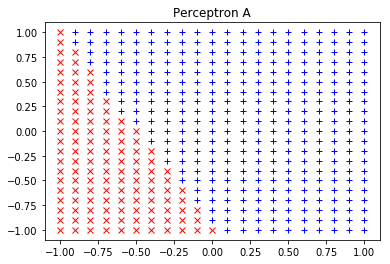

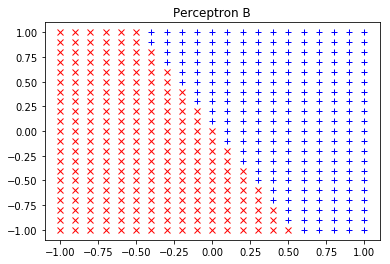

In [29]:
tests = []
for i in range(-10,11):
    for j in range(-10,11):
        xy = [i/10,j/10]
        tests.append(xy)

w0 = 1
w1 = 2
w2 = 1

def test(xy):
    result = w0 + w1*xy[0] + w2*xy[1] 
    if result > 0:
        return(1)
    else: return(0)

for i in tests:
    result = test(i)
    if result == 1:
        tick = 'b+'
    else: tick = 'rx'
    i.append(tick)
    plt.plot(i[0],i[1],i[2])
plt.title('Perceptron A')
plt.show()

tests = []
for i in range(-10,11):
    for j in range(-10,11):
        xy = [i/10,j/10]
        tests.append(xy)

w0 = 0
w1 = 2
w2 = 1

def test(xy):
    result = w0 + w1*xy[0] + w2*xy[1] 
    if result > 0:
        return(1)
    else: return(0)

for i in tests:
    result = test(i)
    if result == 1:
        tick = 'b+'
    else: tick = 'rx'
    i.append(tick)
    plt.plot(i[0],i[1],i[2])
plt.title('Perceptron B')
plt.show()